# CS145 Howework 4


<span style="color:red"> **Important Note:** </span>
HW4 is due on **11:59 PM PT, Nov 20 (Friday, Week 7)**. Please submit through GradeScope. 

## Print Out Your Name and UID

<span style="color:blue"> **Name: Wenxuan Liu, UID: 805152602** </span>

## Before You Start

You need to first create HW4 conda environment by the given `cs145hw4.yml` file, which provides the name and necessary packages for this tasks. If you have `conda` properly installed, you may create, activate or deactivate by the following commands:

```
conda env create -f cs145hw4.yml
conda activate hw4
conda deactivate
```
OR 

```
conda env create --name NAMEOFYOURCHOICE -f cs145hw4.yml 
conda activate NAMEOFYOURCHOICE
conda deactivate
```
To view the list of your environments, use the following command:
```
conda env list
```

More useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks (such as some important hyperparameters) that you are allowed to edit (between STRART/END YOUR CODE HERE), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In [11]:
import numpy as np 
import pandas as pd
import sys 
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


If you can successfully run the code above, there will be no problem for environment setting.

## 1. Clustering Evaluation
This workbook will walk you through an example for calculating different clustering metrics. 

<span style="color:red"> Note: This is a "question-answer" style problem. You do not need to code anything and you are required to calculate by hand (with a scientific calculator). </span>

**Questions**


Suppose we want to cluster the following 20 conferences into four areas, with ground truth label and algorithm output label shown in third and fourth column. Please evaluate the quality of the clustering algorithm according to four different metrics respectively.<img src="conferences.png"  width="600"/>


**Questions (please include intermediate steps)**



1. Calculate purity.
2. Calculate precision.
3. Calculate recall.
4. Calculate F1-score.
5. Calculate normalized mutual information.

**Your answer here:**


<span style="color:red"> Note: you can use several code cells to help you compute the results and answer the questions. Again you don't need to do any coding. </span>

<span style="color:blue"> Please type your answer here! </span>

answer 1


| Ground Truth\Algorithm Output | 1 | 2| 3  | 4    | Total |
| ------------ | --------- | ------ | ----- | ---- | ----- |
| 1            | 0         | 1      | 4     | 0    | 5     |
| 2            | 5         | 0      | 0     | 0    | 5     |
| 3            | 0         | 5      | 0     | 0    | 5     |
| 4            | 0         | 0      | 1     | 4    | 5     |
| Total        | 5         | 6      | 5     | 4    | 20    |



answer 2

We need the compare each pair of conferences and check whether or that they are TP, TN, FP, or FN:

In [12]:
GT = [3,3,1,1,1,4,3,3,4,2,4,2,1,2,3,2,1,2,4,4]
AO = [2,2,3,3,3,4,2,2,3,1,4,1,3,1,2,1,2,1,4,4]
TP, TN, FP, FN = 0, 0, 0, 0
for i in range(1, len(GT)):
    for j in range(i):
        if GT[i]==GT[j] and AO[i]==AO[j]:
            TP += 1
        elif GT[i]==GT[j] and AO[i]!=AO[j]:
            FN += 1
        elif GT[i]!=GT[j] and AO[i]==AO[j]:
            FP += 1
        elif GT[i]!=GT[j] and AO[i]!=AO[j]:
            TN += 1
print(TP, TN, FP, FN)

32 141 9 8


|  GT Label\AO Label | Same|Different|
|-----------|-------|---------|
|Same       |TP=32  |   FN=8  |
|Different  |FP=9   |   TN=141|

$precision = \frac{TP}{TP+FP} = \frac{32}{32+9} = 0.78$

answer 3

$ Recall = \frac{TP}{TP+FN} = \frac{32}{32+8} = 0.8 $

answer 4

$ F-measure=\frac{2*precision*recall}{precision+recall} = \frac{2*0.78*0.8}{0.78+0.8}=0.790 $

answer 5

$H(Ω) = -0.25 log(0.25) – 0.25 log(0.25) – 0.25 log(0.25) – 0.25 log(0.25) = - log(0.25) = 2.0 $

$ H(C) = -0.25 log(0.25) – 0.3 log(0.3) – 0.25 log(0.25) – 0.2 log(0.2) = -0.5 log(0.25) – 0.3 log(0.3) – 0.2 log(0.2) $

      = 1 + 0.52108 + 0.46438
      = 1.98547

$ I(Ω, C) = 0.05 log(0.05 / 0.25 *0.3) + 0.2 log(0.2 / 0.25 * 0.25) + 0.25 log(0.25 / 0.25 *0.25) + 0.25 log(0.25 / 0.25 * 0.3) + 0.05 log(0.05 / 0.25 * 0.25) + 0.2 log(0.2 / 0.25 * 0.2)
= - 0.02925 + 0.33561 + 0.5 + 0.43424 – 0.01609 + 0.4
= 1.6245 $

$$NMI = \frac{I(Ω, C)}{\sqrt{H(C)H(Ω)}}= \frac{1.6245}{\sqrt{2.0 * 1.98547}} = 0.8152$$

## 2. K-means

In this section, we are going to apply K-means algorithm against two datasets (dataset1.txt, dataset2.txt) with different distributions, respectively. 


For each dataset, it contains 3 columns, with the format: x1 \t x2 \t cluster_label. You need to use the first two columns for clustering, and the last column for evaluation.


In [13]:
from hw4code.KMeans import KMeans
k = KMeans()
# As a sanity check, we print out a sample of each dataset
dataname1 = "data/dataset1.txt"
dataname2 = "data/dataset2.txt"
k.check_dataloader(dataname1)
k.check_dataloader(dataname2)


For dataset1: number of datapoints is 150
          x         y  ground_truth_cluster
0 -0.163880 -0.219869                     1
1 -0.886274 -0.356186                     1
2 -0.978910 -0.893314                     1
3 -0.658867 -0.371122                     1
4 -0.072518  0.399157                     1

For dataset2: number of datapoints is 200
          x         y  ground_truth_cluster
0  1.068587  0.136921                     1
1  0.705440  0.393068                     1
2  0.840811 -0.054906                     1
3 -0.923447  0.598501                     1
4  0.784353  0.724743                     1


### 2.1 Coding K-means

Complete the `reassignClusters` and `getCentroid` function in `KMeans.py`. 

Print out each output cluster's size and centroid（x,y) for dataset1 and dataset2 respectively.

In [14]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main(dataname1)
k.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :4
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232975]
Cluster 1 size :50
Centroid [x=-0.4633368646347211, y=-0.466114096981958]
Cluster 2 size :50
Centroid [x=0.9888766205736856, y=2.010478965197201]

For dataset2
Iteration :3
Cluster 0 size :102
Centroid [x=1.2708406269481842, y=-0.08583389704900131]
Cluster 1 size :98
Centroid [x=-0.2018593506236787, y=0.5726963240559536]


### 2.2 Purity and NMI Evaluation

Complete the `compute_purity` function in `KMeans.py`. 

In order to compute NMI, you need to firstly compute NMI matrix and then do the calculation. That is to complete the `getNMIMatrix` and `calcNMI` functions in `KMeans.py`.

Print out the purity and NMI for each dataset respectively.

In [15]:
k = KMeans()
#========================#
# STRART YOUR CODE HERE  #
#========================#
k.main(dataname1, isevaluate=True)
k.main(dataname2, isevaluate=True)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Iteration :4
Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Centroid [x=2.5737264423871213, y=-0.027462568841232975]
Cluster 1 size :50
Centroid [x=-0.4633368646347211, y=-0.466114096981958]
Cluster 2 size :50
Centroid [x=0.9888766205736856, y=2.010478965197201]

For dataset2
Iteration :3
Purity is 0.760000
NMI is 0.205096
Cluster 0 size :102
Centroid [x=1.2708406269481842, y=-0.08583389704900131]
Cluster 1 size :98
Centroid [x=-0.2018593506236787, y=0.5726963240559536]


### 2.3 Visualization

The clustering results for KMeans are saved as `KMeans_dataset1.csv` and `KMeans_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

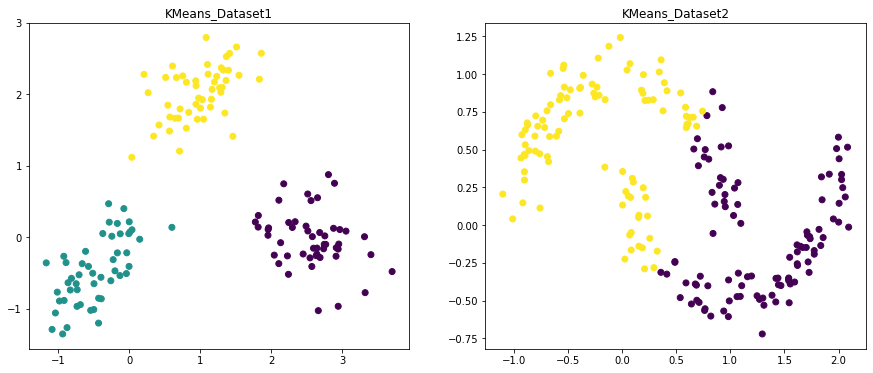

In [16]:
CSV_FILE_PATH1 = 'Kmeans_dataset1.csv'
CSV_FILE_PATH2 = 'Kmeans_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("KMeans_Dataset1")
ax1.title.set_text("KMeans_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
ax0.scatter(df1['x'], df1['y'], c=df1['pred'])
ax1.scatter(df2['x'], df2['y'], c=df2['pred'])
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    

**Question** 


Give the pros and cons of K-means algorithm. (At least one for pro and two for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

Pros:

k-means is relative simple to implement and is guaranteed to converge. Also, it can easily be adapted to new examples.

Cons:
1. K-means cannot well clustering data points with non-spherical shapes distributions and various density and size.
2. K-means can be influenced by outliers such that centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored.

## 3 DBSCAN

In this section, we are going to use DBSCAN for clustering the same two datasets. 



### 3.1 Coding DBSCAN

Complete the `dbscan` function in `DBSCAN.py`. Print out the purity, NMI and cluter size for each dataset respectively.

In [17]:
from hw4code.DBSCAN import DBSCAN
d = DBSCAN()
#========================#
# STRART YOUR CODE HERE  #
#========================#
d.main(dataname1)
d.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================# 


For dataset1
Esp :0.3560832705047313
Number of clusters formed :4
Noise points :11
Purity is 0.940000
NMI is 0.959065
Cluster 0 size :49
Cluster 1 size :41
Cluster 2 size :47
Cluster 3 size :4

For dataset2
Esp :0.18652096476712493
Number of clusters formed :3
Noise points :3
Purity is 0.985000
NMI is 0.817349
Cluster 0 size :99
Cluster 1 size :51
Cluster 2 size :47


### 3.2 Visualization

The clustering results for DBSCAN are saved as `DBSCAN_dataset1.csv` and `DBSCAN_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

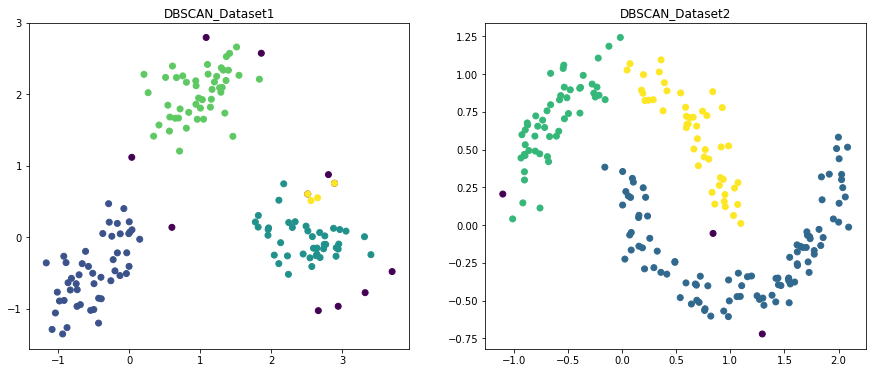

In [18]:
CSV_FILE_PATH1 = 'DBSCAN_dataset1.csv'
CSV_FILE_PATH2 = 'DBSCAN_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("DBSCAN_Dataset1")
ax1.title.set_text("DBSCAN_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
ax0.scatter(df1['x'], df1['y'], c=df1['pred'])
ax1.scatter(df2['x'], df2['y'], c=df2['pred'])
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    

**Question** 


Give the pros and cons of DBSCAN algorithm. (At least two for pro and one for cons to get full marks)


**Your answer here**


<span style="color:blue"> Please type your answer here! </span>

Pros:

1. DBSCAN does not require one to specify the number of clusters in the data.
2. DBSCAN can find arbitrarily shaped clusters, and it has a notion of noise. 

Cons:

1. DBSCAN needs to manually choose minPts and ε value, and if minPts is too large or ε is too small, it can find no neighbors for all points and form too many clusters than expected.
2. DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot be chosen appropriately for all clusters then.

## 4 GMM

In this section, we are going to use GMM for clustering the same two datasets. 



### 4.1 Coding GMM

Complete the `Estep` and 'Mstep' function in `GMM.py`. Print out the purity, NMI, final mean, covariance and cluter size for each dataset respectively.

In [39]:
from hw4code.GMM import GMM
g = GMM()
#========================#
# STRART YOUR CODE HERE  #
#========================#
g.main(dataname1)
g.main(dataname2)
#========================#
#   END YOUR CODE HERE   #
#========================#


For dataset1
Number of Iterations = 22

After Calculations
Final mean = 
-0.46247285694404044 
-0.4638749980764899 

0.9898929396029765 
2.011802723814242 

2.57342634413319 
-0.027108746076609493 


Final covariance = 
For Cluster : 1
0.14918910487220216 
0.1173463005433889 

0.1173463005433889 
0.21554861253107502 


For Cluster : 2
0.16028233507625483 
0.07486967581052754 

0.07486967581052754 
0.13939774162738802 


For Cluster : 3
0.18039223672749394 
-0.04672614559811055 

-0.04672614559811055 
0.15206459963738583 


Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Cluster 1 size :50
Cluster 2 size :50

For dataset2
Number of Iterations = 95

After Calculations
Final mean = 
0.7464905663922624 
0.45649665848541066 

0.2828785188939096 
-0.05970560727188748 


Final covariance = 
For Cluster : 1
0.7692790765358336 
-0.28782809642382134 

-0.28782809642382134 
0.1901249384356509 


For Cluster : 2
0.6828574757628693 
-0.30058915994390517 

-0.30058915994390517 
0.175835594851

## OUTPUT:
For dataset1
Number of Iterations = 22

After Calculations
Final mean =
-0.46247285694404044
-0.4638749980764899

0.9898929396029765
2.011802723814242

2.57342634413319
-0.027108746076609493


Final covariance =
For Cluster : 1
0.14918910487220216
0.1173463005433889

0.1173463005433889
0.21554861253107502


For Cluster : 2
0.16028233507625483
0.07486967581052754

0.07486967581052754
0.13939774162738802


For Cluster : 3
0.18039223672749394
-0.04672614559811055

-0.04672614559811055
0.15206459963738583


Purity is 1.000000
NMI is 1.000000
Cluster 0 size :50
Cluster 1 size :50
Cluster 2 size :50

For dataset2
Number of Iterations = 95

After Calculations
Final mean =
0.7464905663922624
0.45649665848541066

0.2828785188939096
-0.05970560727188748


Final covariance =
For Cluster : 1
0.7692790765358336
-0.28782809642382134

-0.28782809642382134
0.1901249384356509


For Cluster : 2
0.6828574757628693
-0.30058915994390517

-0.30058915994390517
0.17583559485120054


Purity is 0.690000
NMI is 0.107406
Cluster 0 size :106
Cluster 1 size :94

### 4.2 Visualization

The clustering results for GMM are saved as `GMM_dataset1.csv` and `GMM_dataset2.csv` respectively under your root folder. Plot the clustering results for the two datasets, with different colors representing different clusters.

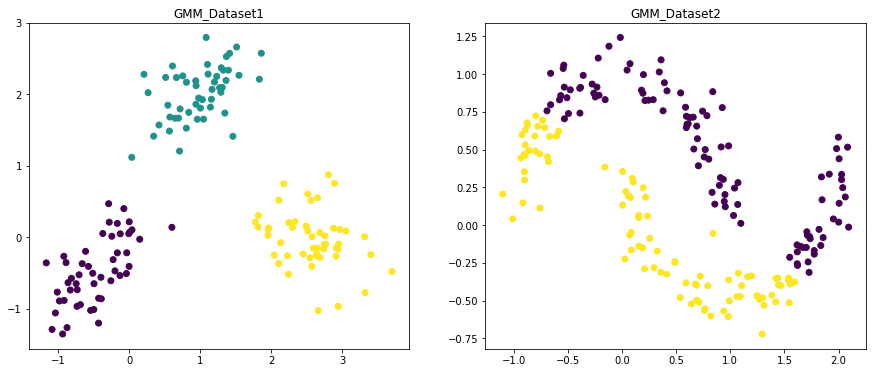

In [20]:
CSV_FILE_PATH1 = 'GMM_dataset1.csv'
CSV_FILE_PATH2 = 'GMM_dataset2.csv'

df1 = pd.read_csv(CSV_FILE_PATH1,header=None,names=['x','y','pred'])
df2 = pd.read_csv(CSV_FILE_PATH2,header=None,names=['x','y','pred'])
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(15, 6))
ax0.title.set_text("GMM_Dataset1")
ax1.title.set_text("GMM_Dataset2")

#========================#
# STRART YOUR CODE HERE  #
#========================#
ax0.scatter(df1['x'], df1['y'], c=df1['pred'])
ax1.scatter(df2['x'], df2['y'], c=df2['pred'])
#========================#
#   END YOUR CODE HERE   #
#========================# 
plt.show()
    
    
    


**Questions**



1. Give the pros and cons of GMM algorithm. (At least two for pro and two for cons to get full marks)
2. Compare the visualization results from three algorithms, analyze for each dataset why these algorithms would produce such result.

**Your answer here:**


<span style="color:blue"> Please type your answer here! </span>

Pros of GMM:

1. GMM can get the probability of clustering each point into each cluster, instead of only being able to discretely get a label for each point.
2. GMM only needs a small number of parameters to characterize the clusters.
3. GMM can generate labels based on models with different density and sizes of clusters.

Cons of GMM:

1. GMM works poorly with non-spherical cluster shapes, probably because it may reach a local optimization.
2. GMM takes a long training time, since it has to repeat the EM steps which is computational expensive.

Reasoning over dataset1:

For K-Means, each point is assigned to the nearest cluster and the centroids are updated correspondingly for each iteration. Since the final purity and NMI are both 1.0, the clustering matches each datapoint with the correct cluster given that each point has the shortest Euclidean distance with its cluster's centroid compared to other cluster's centroid.

For DBSCAN, there are four clusters and some noise points located with some distance to the clusters. This clustering is because DBSCAN keeps finding reachable neighbors that satisfy minPts and ε distance. So we can see that among each cluster, each point has at least 3 points in the same cluster that are very close to it; Also, the noise points don't have at least 3 points that are close to it.

For GMM, clusters are formed by different gaussian models. Since the three clusters in the plots are close to 3 of 2D gaussian distributions, and since the purity and NMI are both 1.0, the clustering matches each datapoint with the correct cluster.

Reasoning over dataset2:

For K-Means, each point is assigned to the nearest cluster and the centroids are updated correspondingly for each iteration. Since the original clusters are not in spherical shape, the clustering can only match each datapoint into the cluster with the shortest Euclidean distance with its cluster's centroid compared to distances to other cluster's centroid. So the clustering result is still approximately spherical.

For DBSCAN, there are three clusters and some noise points located with some distance to the clusters. This clustering result is because DBSCAN keeps finding reachable neighbors that satisfy minPts and ε distance. So we can see that among each non-spherical cluster, each point has at least 3 points in the same cluster that are very close to it; Also, the noise points don't have at least 3 points that are close to it. The yellow and green parts are separated because there are no three close enough points connect them, so point in yellow cluster is not reachable to point in green cluster.

For GMM, clusters are formed by different gaussian models. So, we can see two clusters in the plots are most close to 2 of 2D gaussian distributions with relatively evenly distributed points along the spherical(oval) gaussian distributions.

## 5 Bonus Question

Prove that KMeans algorithm would guarantee covergence. (**Hint: prove for each step the loss would descrease.**)

<span style="color:blue"> Please type your answer here! </span>

Since the objective function is $J=\sum_j^k\sum_iw_{ij}||x_i-c_j||^2$,we can see that for step 1, we would find $w_{ij}$ that minimized J for fixed centers(such that $||x_i-c_j||^2$ is the smallest), which is the current local minimum for given centers, and at this step the loss would decrease;

For step 2, we would find centers that minimizes J such that the choice of centers would make the first derivative of J be 0, which is the local minimum for J and can decrease the loss.

So, by each iteration, the loss is guaranteed to decrease and would converge to its local minimum for KMeans algorithm.

# End of Homework 4 :)
After you've finished the homework, please print out the entire `ipynb` notebook and four `py` files into one PDF file. Make sure you include the output of code cells and answers for questions. Prepare submit it to GradeScope. Also this time remember assign the pages to the questions on GradeScope